Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0442 - loss: 3.6352  
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1586 - loss: 3.5916
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1704 - loss: 3.4454
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1469 - loss: 3.3927
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1782 - loss: 3.2421
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1300 - loss: 3.2307
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1248 - loss: 3.1995
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1964 - loss: 3.1428
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1834 - loss: 3.1255
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1652 - loss: 3.1311
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1743 - loss: 3.1385
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1704 - loss: 3.1301

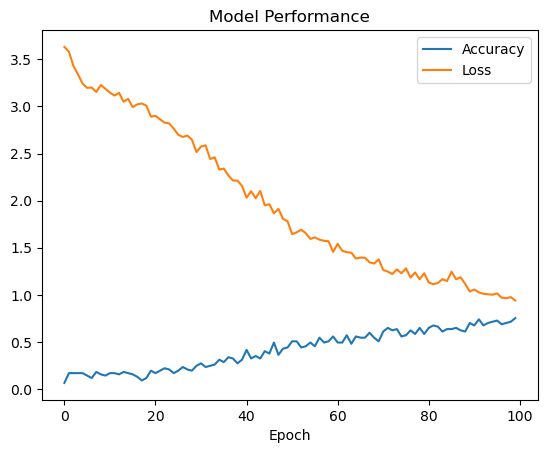

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load and preprocess text data
with open('your_text_file.txt', 'r') as file:
    text = file.read().lower()

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Generate input sequences
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    input_sequences += [token_list[:i + 1] for i in range(1, len(token_list))]

# Prepare data
max_seq_len = max(len(x) for x in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')
X, y = input_sequences[:, :-1], tf.keras.utils.to_categorical(input_sequences[:, -1], num_classes=total_words)

# Build and compile model
model = Sequential([
    Embedding(total_words, 100, input_length=max_seq_len - 1),
    LSTM(150, return_sequences=True), Dropout(0.2),
    LSTM(150), Dropout(0.2),
    Dense(total_words, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X, y, epochs=100, verbose=1)

# Generate text
def generate_text(seed_text, next_words, model, max_seq_len):
    for _ in range(next_words):
        token_list = pad_sequences([tokenizer.texts_to_sequences([seed_text])[0]], maxlen=max_seq_len - 1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        seed_text += " " + next(word for word, index in tokenizer.word_index.items() if index == predicted)
    return seed_text

# Example usage
print(generate_text("your seed text", 10, model, max_seq_len))

# Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.legend()
plt.show()
